# 1. Z-Score Method

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Survived'])
df.head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [3]:
df['Age'].isnull().sum()

177

C:\Users\jayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

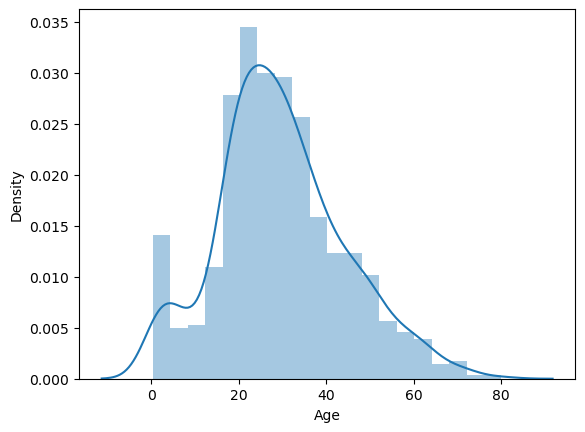

In [5]:
sns.distplot(df['Age'])`

In [7]:
df['Age'].skew()

0.38910778230082704

obsevation: Assuming the above age columns is almost normally distributed and performing the z-core method

In [10]:
print("The mean of the age column" , df['Age'].mean())
print("The std of the age column", df['Age'].std())
print("The min of the age column", df['Age'].min())
print("The max of the age column", df['Age'].max())
# print(f'The minimum value of age column {df['Age'].min()}')
# print(f'The maximum value of the age column {df['Age'].max()}')

The mean of the age column 29.69911764705882
The std of the age column 14.526497332334044
The min of the age column 0.42
The max of the age column 80.0


In [13]:
upper_limit= df['Age'].mean() + 3*df['Age'].std()

In [16]:
upper_limit

73.27860964406095

In [14]:
lower_limit = df['Age'].mean() - 3*df['Age'].std()

In [18]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Age'],df['Survived'],test_size=0.2)

In [29]:
x_train_df = pd.DataFrame(x_train,columns=['Age'])
x_test_df = pd.DataFrame(x_test,columns=['Age'])
 

In [28]:
x_train_trf = si.fit_transform(x_train_df)
x_test_trf = si.fit_transform(x_test_df)

In [30]:
print("The mean of the age column" , x_train_df['Age'].mean())
print("The std of the age column", x_train_df['Age'].std())
print("The min of the age column", x_train_df['Age'].min())
print("The max of the age column", x_train_df['Age'].max())

The mean of the age column 29.613339100346025
The std of the age column 14.384909400727327
The min of the age column 0.42
The max of the age column 71.0


In [48]:
upper_limit= x_train_df['Age'].mean() + 2*x_train_df['Age'].std()
lower_limit = x_train_df['Age'].mean() - 2*x_train_df['Age'].std()
print(upper_limit)
print(lower_limit)

58.38315790180068
0.8435202988913701


## 1.1 Trimming:

In [45]:
# Finding the outliers
x_train_df[ (x_train_df['Age'] > 58.3) | (x_train_df['Age'] < 0.84) ]

,Age
438,64.00
456,65.00
280,65.00
625,61.00
232,59.00
694,60.00
745,70.00
644,0.75
493,71.00
755,0.67


C:\Users\jayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

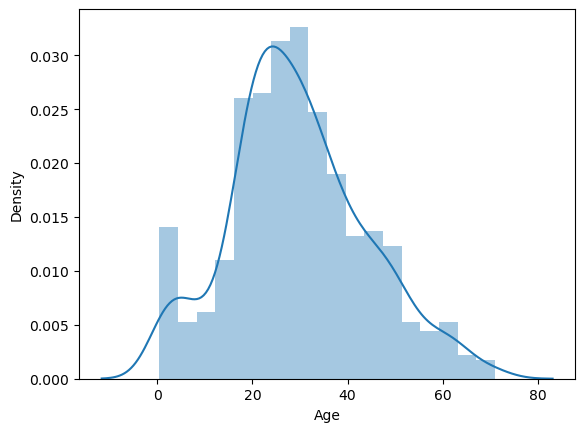

In [46]:
sns.distplot(x_train_df['Age'])

In [47]:
# The rows in which the outliers are not there
x_train_df[ (x_train_df['Age'] < 58.3) | (x_train_df['Age'] > 0.84) ]

,Age
245,44.0
874,28.0
850,4.0
251,29.0
864,24.0
...,...
326,61.0
66,29.0
489,9.0
407,3.0


## 1.2 Capping:

In [49]:
x_train_df['Age']=np.where(x_train_df['Age'] > upper_limit,
   upper_limit,np.where(x_train_df['Age'] < lower_limit,lower_limit,x_train_df['Age']))

In [50]:
x_train_df

,Age
245,44.0
874,28.0
850,4.0
495,NaN
611,NaN
...,...
66,29.0
489,9.0
407,3.0
306,NaN


# 2. IQR Method:

In [62]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [78]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

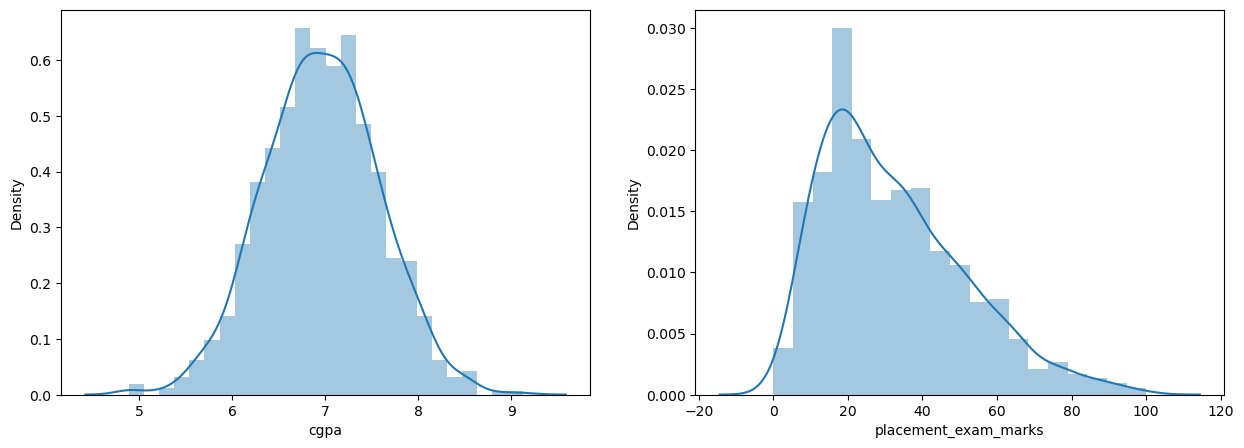

In [72]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])


plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [67]:
df['placement_exam_marks'].skew()

0.8356419499466834

<AxesSubplot:xlabel='placement_exam_marks'>

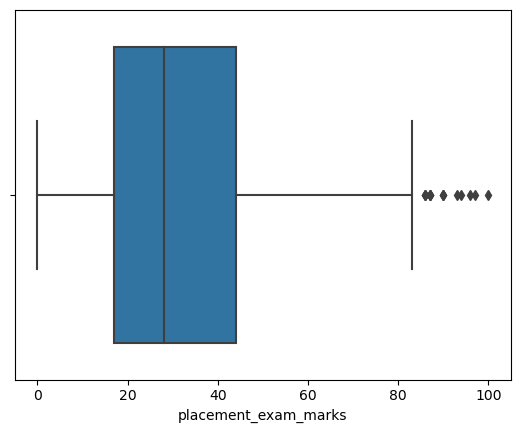

In [79]:
sns.boxplot(df['placement_exam_marks'])

In [73]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [74]:
iqr = percentile75-percentile25

In [75]:
percentile25

17.0

In [76]:
percentile75

44.0

In [80]:
upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr

In [90]:
upper_limit

84.5

In [81]:
# The outliers which are above upper limit
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [83]:
# we can see the diagram above there are no before the lower limit
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## 2.1 Tapping

In [85]:
 df_new = df[df['placement_exam_marks'] < upper_limit]

<AxesSubplot:xlabel='placement_exam_marks'>

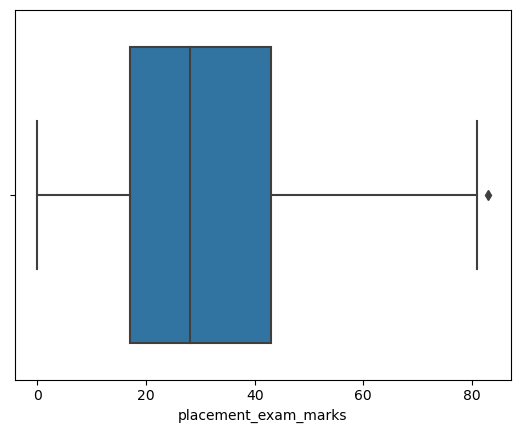

In [86]:
sns.boxplot(df_new['placement_exam_marks'])

## 2.2 Capping

In [100]:
df['placement_exam_marks'] = np.where(df['placement_exam_marks']>upper_limit,
                                     upper_limit,
                                     np.where(df['placement_exam_marks'] < lower_limit,
                                             lower_limit,
                                             df['placement_exam_marks']))

In [102]:
df['placement_exam_marks'].max()

84.5

<AxesSubplot:xlabel='placement_exam_marks'>

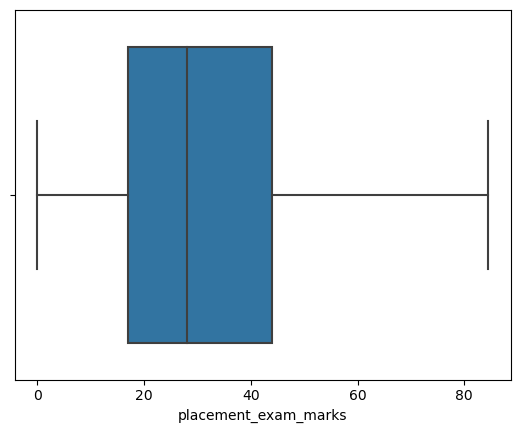

In [91]:
sns.boxplot(df['placement_exam_marks'])

Observation: we can there are no outliers in the above diagram

In [92]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

# 3. Percentile Method

In [103]:
df2 = pd.read_csv('weight-height.csv')
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [109]:
df2.shape

(10000, 3)

In [105]:
df2['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

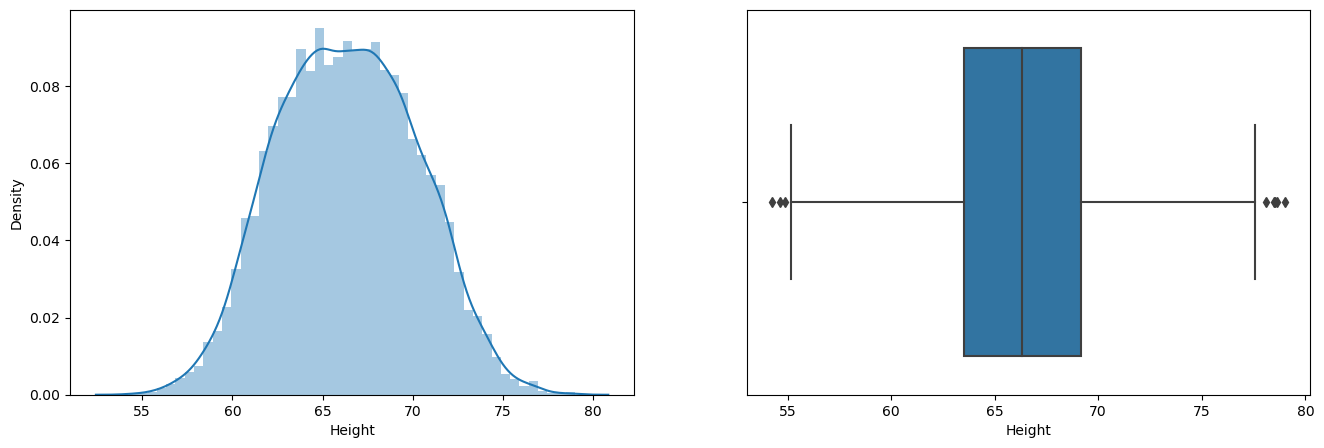

In [107]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2['Height'])
plt.show()

Now our choice to select the percentile value

In [111]:
upper_limit = df2['Height'].quantile(0.99)


lower_limit = df2['Height'].quantile(0.01)


In [116]:
upper_limit

74.7857900583366

In [122]:
# finding the outliers
df2[(df2['Height'] > upper_limit) | (df2['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## 3.1 Tapping

In [125]:
# Here df2_new is dataset which doesn't contain outliers
df2_new=df2[(df2['Height'] <= upper_limit) & (df2['Height'] >= lower_limit)]
df2_new

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


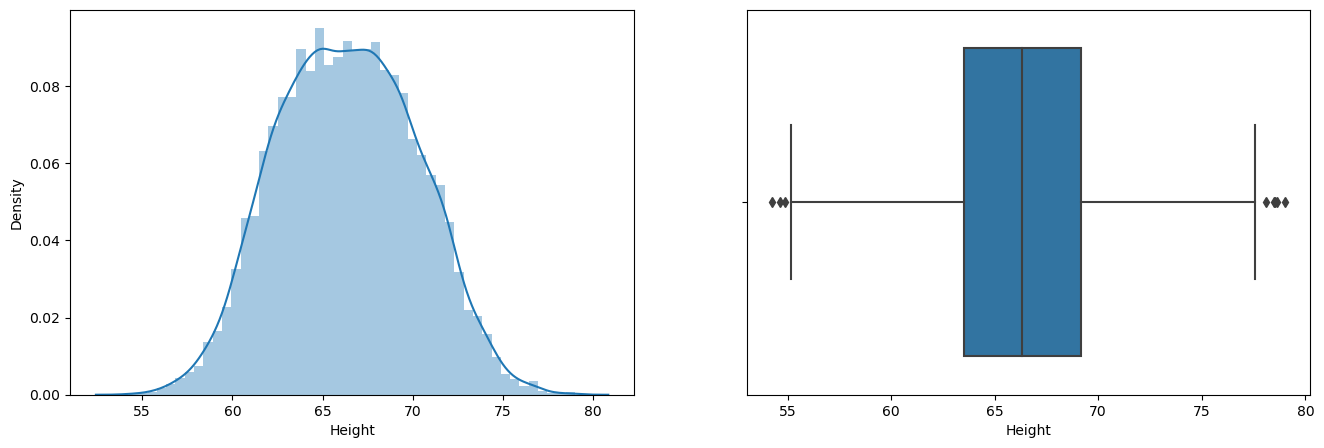

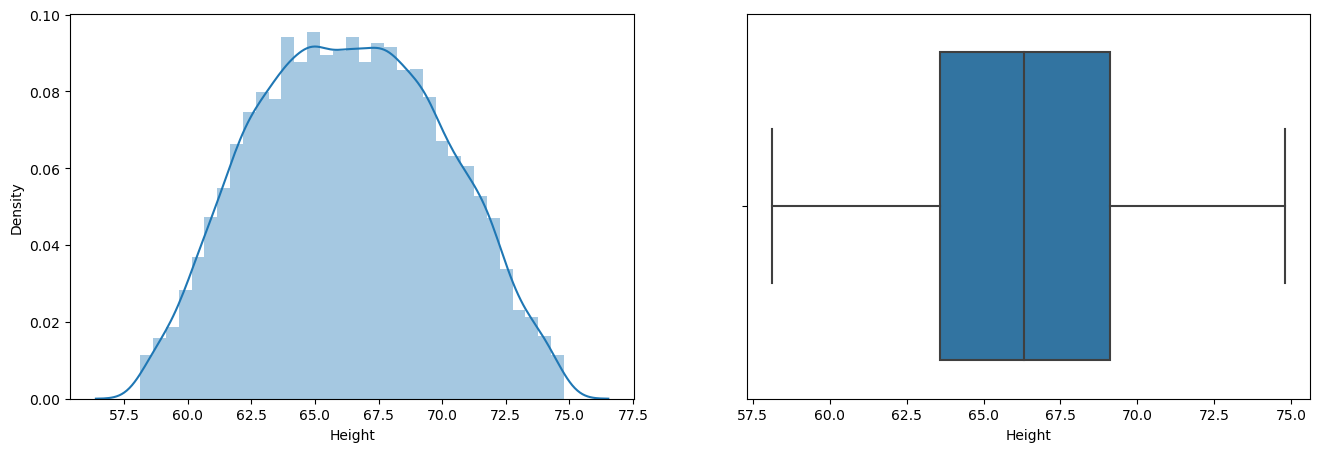

In [126]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2['Height'])
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2_new['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2_new['Height'])
plt.show()

## 3.2 Capping

In [128]:
df2['Height'] = np.where(df2['Height'] >= upper_limit,
                        upper_limit,
                        np.where(df2['Height'] <= lower_limit,
                                lower_limit,
                                df2['Height']))

In [129]:
df2.shape

(10000, 3)

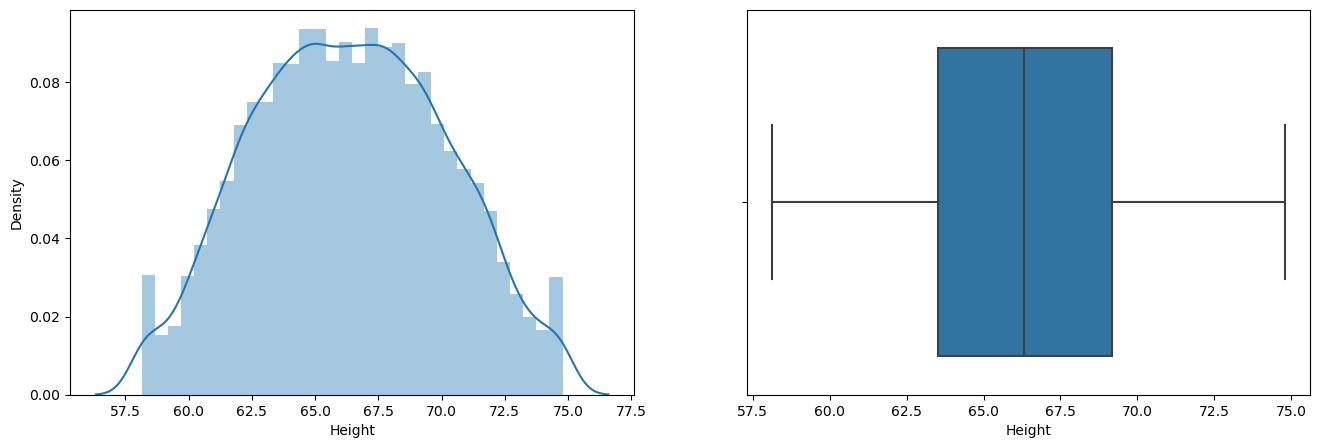

In [130]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['Height'])

plt.subplot(1,2,2)
sns.boxplot(df2['Height'])
plt.show()